In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [21]:
from sklearn.preprocessing import PowerTransformer


In [2]:
df = pd.read_csv('../../dataset/train_processed.csv')

In [6]:
df.isnull().sum()

Id                  0
LotFrontage         0
LotArea             0
LotShape            0
OverallQual         0
                   ..
BsmtFinType1_Unf    0
Fence_GdWo          0
Fence_MnPrv         0
Fence_MnWw          0
SalePrice           0
Length: 95, dtype: int64

In [58]:
X_train = df.drop(columns=['SalePrice'])
Y_train = df['SalePrice']

In [ ]:
for i in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[i])
    plt.title('Distribution')

    plt.subplot(122)
    stats.probplot(X_train[i], dist="norm", plot=plt)
    plt.title('QQ Plot')
    if i == 'GarageArea':
        break

plt.show()

In [9]:
yj_transform = PowerTransformer()
X_train_transformed = yj_transform.fit_transform(X_train)

In [17]:
pd.DataFrame({'cols':X_train.columns, 'Yeo_Johnson_lambdas': yj_transform.lambdas_})

,cols,Yeo_Johnson_lambdas
0,Id,0.710746
1,LotFrontage,1.030202
2,LotArea,-0.337527
3,LotShape,2.463230
4,OverallQual,0.864962
...,...,...
89,BsmtFinType1_Rec,-5.447287
90,BsmtFinType1_Unf,-1.069756
91,Fence_GdWo,-12.239384
92,Fence_MnPrv,-4.667228


In [10]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

Text(0.5, 1.0, 'Before Yeo-Johnson Transformation')

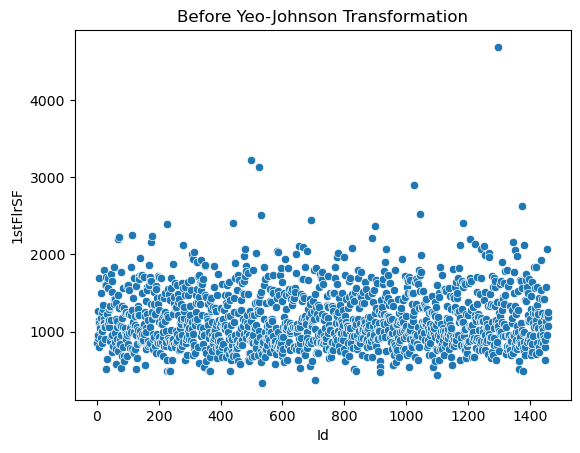

In [18]:
sns.scatterplot(y='1stFlrSF', x=df['Id'], data=df)
plt.title('Before Yeo-Johnson Transformation')

Text(0.5, 1.0, 'After Yeo-Johnson Transformation')

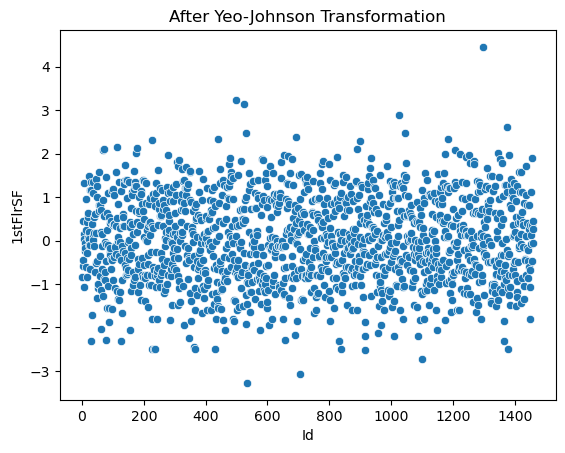

In [19]:
sns.scatterplot(y='1stFlrSF', x=df['Id'], data=X_train_transformed)
plt.title('After Yeo-Johnson Transformation')

In [ ]:
for i in df.columns:
    sns.boxplot(df[i], whis=2)
    if i =='GarageArea':
        break
    plt.show()
    

In [ ]:
cols = ['LotFrontage', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 'GarageArea']

for i in cols:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[i] = np.where(
        df[i] > upper_limit,
        upper_limit,
        np.where(
            df[i] < lower_limit,
            lower_limit,
            df[i]
        )
    )

In [59]:
X_train = X_train.dropna()

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

In [61]:
X_train_trf = pca.fit_transform(X_train)

In [64]:
X_train_trf.shape

(753, 94)

Text(0.5, 1.0, 'PCA (2 components)')

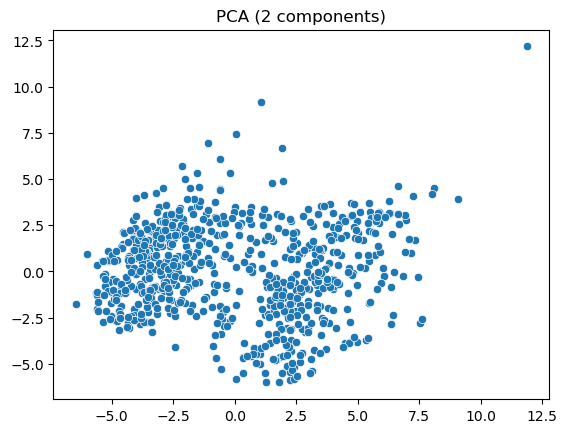

In [45]:
import seaborn as sns
sns.scatterplot(x=X_train_trf[:, 0], y=X_train_trf[:, 1])
plt.title('PCA (2 components)')


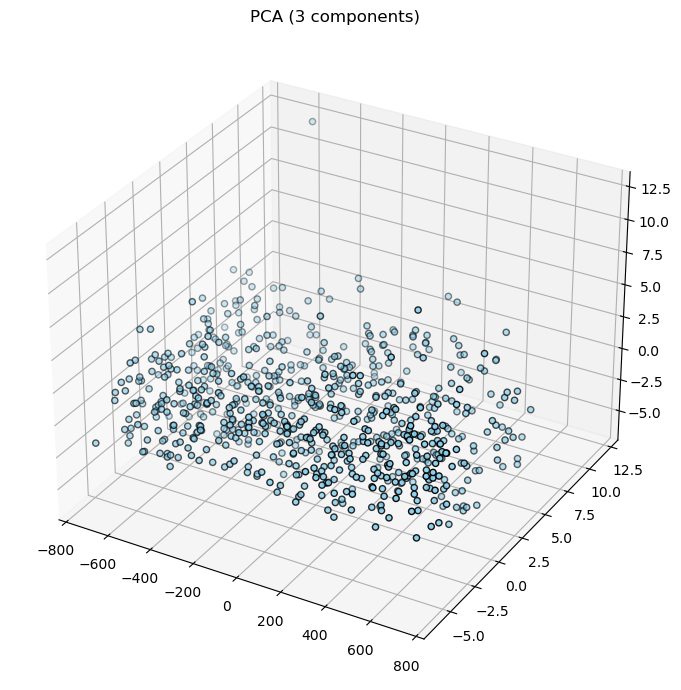

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = X_train_trf[:, 0]
y = X_train_trf[:, 1]
z = X_train_trf[:, 2]

ax.scatter(x, y, z, c='skyblue', edgecolor='k')

ax.set_title('PCA (3 components)')

plt.tight_layout()
plt.show()


In [65]:
pca.explained_variance_.shape

(94,)

In [66]:
pca.components_

array([[-9.99999597e-01,  5.70480556e-05,  1.59557495e-04, ...,
         1.17117444e-04,  1.01549699e-05, -6.45285432e-05],
       [ 1.71680130e-04,  8.64300746e-02,  2.63943699e-02, ...,
        -4.16276620e-02, -7.07893486e-02, -1.50796983e-02],
       [ 1.54217192e-04,  4.39134795e-02,  1.76386051e-01, ...,
         2.14358389e-02,  1.99535765e-02,  9.80155736e-03],
       ...,
       [-7.66532386e-06,  1.79347812e-03, -2.54273354e-03, ...,
        -1.63156669e-03,  4.76166438e-04, -1.63919128e-03],
       [-1.40896017e-06, -4.79399227e-04, -7.03676545e-04, ...,
        -5.93037461e-04, -6.26543076e-04, -3.02443341e-04],
       [-0.00000000e+00,  3.49933226e-17,  4.02123281e-18, ...,
         1.89292348e-17,  7.65395460e-18, -9.37755934e-17]])

In [68]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99948457, 0.99955131, 0.99958521, 0.9996088 , 0.99963164,
       0.99964841, 0.99966396, 0.99967832, 0.99969124, 0.99970312,
       0.99971464, 0.99972569, 0.99973616, 0.99974632, 0.99975625,
       0.99976607, 0.99977535, 0.99978423, 0.9997926 , 0.99980057,
       0.99980842, 0.99981603, 0.99982336, 0.99983046, 0.99983723,
       0.99984379, 0.99985005, 0.99985621, 0.99986223, 0.999868  ,
       0.9998737 , 0.99987925, 0.99988449, 0.99988961, 0.99989448,
       0.99989925, 0.99990385, 0.99990818, 0.9999123 , 0.99991634,
       0.9999203 , 0.99992415, 0.99992784, 0.99993145, 0.9999349 ,
       0.99993831, 0.99994154, 0.99994472, 0.9999478 , 0.99995069,
       0.99995349, 0.99995615, 0.99995877, 0.99996128, 0.99996374,
       0.99996602, 0.99996823, 0.99997038, 0.99997243, 0.99997449,
       0.99997638, 0.99997822, 0.99997995, 0.99998156, 0.99998311,
       0.99998457, 0.99998591, 0.99998719, 0.9999884 , 0.99998956,
       0.99999064, 0.99999164, 0.99999258, 0.99999347, 0.99999

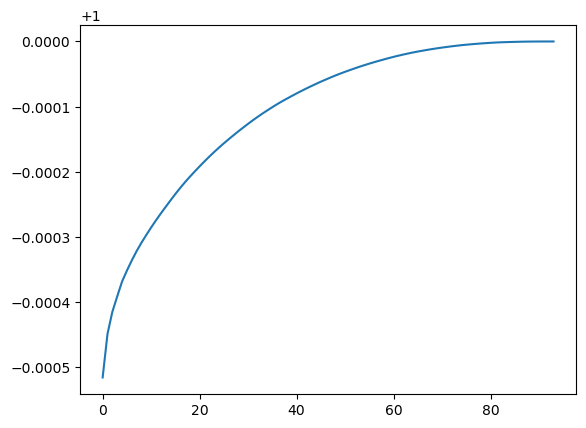

In [69]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))